# Example Supervised Learning: Learning handwritten digits

Consider the following task of recognizing handwritten digits of the [MNIST data set](https://en.wikipedia.org/wiki/MNIST_database), which is learned by a tabula rasa machine.

The maching gets a __training data set__ $(x_i, y_i, i=1,\ldots, M)$ of handwritten digits $x_i$ and their true meaning $y_i$. In our case $M=60 000$. From this training data set the machine should learn and predict the true meaning of new handwritten digits coming from a test set in our case with 10000 elements.  

This is an instance of so-called __supervised learning__!

The input data are images representing handwritten digits.
Each image is 28 x 28 pixels, and each pixel is represented by a number (gray level).
These arrays can be flattened into vectors of 28 x 28 = 784 numbers.
You can then see each image as a point in a 784-dimensional vector space.

To implement this learning task we use [Keras](https://keras.io/), which is a high-level neural networks API (Application programming interface), written in Python and capable of running on top of TensorFlow. It was developed with a focus on enabling fast experimentation.
Notice the simplicity of the code and its accessibility.

In [ ]:
import numpy as np
import tensorflow as tf


# load MNIST data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# tf.keras: Implementation of the Keras API meant to be a high-level API for TensorFlow.
# loads mnist from keras.datasets

4


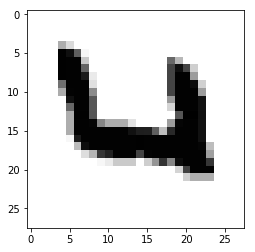

In [ ]:
import matplotlib.pyplot as plt

image_index = np.random.randint(59999)  # You may select anything up to 60,000
print(y_train[image_index]) # The label of training data point is printed
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # 28 image columns and rows,
# the last entry corresponds to the color chanels (1 for grey scale)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB (red green blue) codes by dividing it to the max RGB value.
# For the pixels there are usually 256 color values [0-255], normalization to [0,1]
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape) #shape property giv
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train.shape

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


(60000,)

How can the machine now learn from these training data? What is used here are so-called __artificial neural networks__.


Artificial neural networks constitute a mathematically and computationally convenient tool which is inspired by our understanding of how the brain
works (simplified in many respects).

In [ ]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


The attributes "Dense, Conv2D,  MaxPooling2D, Flatten, Dropout" specify (the shape of) the layers.
- Dense means that the entries of the matrix are fully populated
- Conv2D is a [convolutional layer](https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8), often used for image recognition: input is then a tensor with shape (number of images) x (image width) x (image height) x (image depth). A kernel/filter is specified via the height and width of the 2D convolution window. It corresponds to a linear map applied to the subdata of the size of the convolution window. One slides over the whole image. The convolution layer consists of a set of such filters $\Rightarrow$ much fewer parameters than in a dense layer.
- MaxPooling2D: is specified by the pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. Goal is to reduce the spatial size of the representation to reduce the amount of parameters and computation in the network.
- Flatten: makes a vector out of the 2D (or higher dimensional) data points
- Dropout: consists in randomly setting a specified fraction of the parameters of the matrices to 0 at each update during training time, which helps to prevent overfitting.

In [ ]:
# Creating a Sequential Model and adding the layers
model = Sequential()

layer1=Conv2D(28, kernel_size=(3,3), input_shape=input_shape) # (3,3) for mnist
#Input to such a layer is a tensor(batch, rows, cols, channels)
#Output of such a layer is a tensor(batch, rows, cols, filters)
layer1.trainable=True
model.add(layer1)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the arrays for fully connected layers


layer2 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#Output dimension is 128, activation function is relu, kernel initializer refers
#to how the parameters of the matrix are initialized,
layer2.trainable=True #False
model.add(layer2)

#layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#layer3.trainable=False
#model.add(layer3)

model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
#10 is the output dimension,
# Last layer, i.e. read out map is a composition of an affine function and the softmax
#softmax is applied to give the probability of the digits 0 to 9

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#categorial_crossentropy -\sum_{k=1}^10 1_{y_train=k}log(p_k)


model.fit(x=x_train,y=y_train, epochs=1)#Training
x=model.evaluate(x_test, y_test)#Testing

Epoch 1/1
10000/10000 [==============================] - 1s 135us/step


In [ ]:
print('Test result: [loss, accuracy]=',x)

Test result: [loss, accuracy]= [0.07975045167319476, 0.9739999771118164]


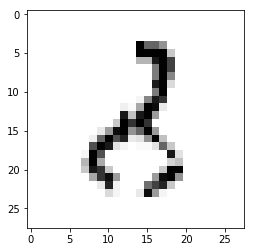

Prediction 2
Grand Truth 8


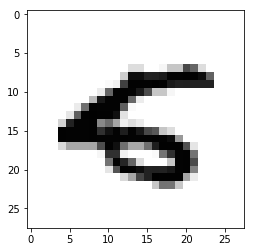

Prediction 4
Grand Truth 5


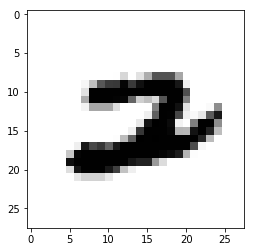

Prediction 7
Grand Truth 2


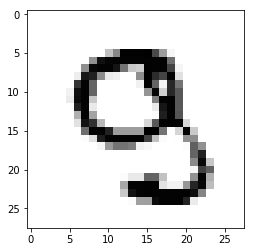

Prediction 8
Grand Truth 9


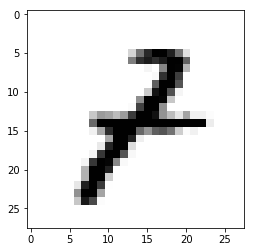

Prediction 1
Grand Truth 7


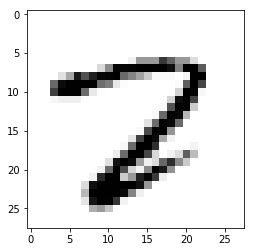

Prediction 7
Grand Truth 2
Failure rate 0.06


In [ ]:
img_rows=28
img_cols=28
count = 0

for i in range(100): # Prediction on 100 test data points
    image_index = np.random.randint(10000)
    pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
    #print(pred)
    #print(pred.argmax())
    if pred.argmax() != y_test[image_index]: #show if prediction is not correct
        plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
        plt.show()
        print('Prediction',pred.argmax())
        print('Grand Truth',y_test[image_index])
        count = count + 1

print('Failure rate',count/100)

What happened here?

A neural network has been constructed which takes as input the picture of the handwritten digits (28 times 28 pixels) and produces an output which corresponds to (the probability of) its value. The parameters of the neural network are trained on 60000 training pictures and then tested on 10000 test pictures.

In [ ]:
model.count_params()

607394

An already amazing amount of 607394 parameters is trained ...

Compare to ChatGPT-4, which has -- according to multiple sources -- approximately 1.8 trillion $1.8*10^{12} $
parameters.  

# Illustration of stochastic gradient descent

Consider the random function $(\theta_1, \theta_2) \mapsto F(\theta, U) =0.25(\sin(U(\theta_1^2+1/2\theta_2^2))+2)$ for $U$ a uniformly distributed random variable on the interval $[\pi, 3\pi]$. Find the minimum of
$$
\min_{\theta \in [0,1]^2 } \frac{1}{M} \sum_{i=1}^M F(\theta, U(\omega_i))
$$
via stochastic gradient descent. Illustrate the evolution of the loss function and $\theta^{(k)}$ as $k$ evolves.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

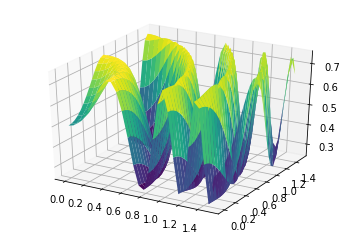

In [ ]:
def f(x, y):
    return (np.sin((2*np.pi*np.random.random(1)+np.pi)*(x ** 2 + 1/2*y ** 2))+2)*0.25
x = np.linspace(0, 1.5, 30)
y = np.linspace(0, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

Z=f(X,Y)

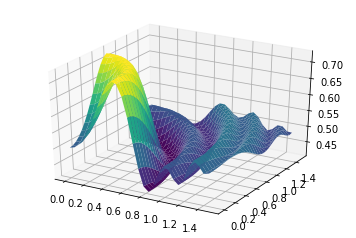

In [ ]:
def averagef(x, y, N):
    result=0*x+0*y
    for i in range(N):
        result=result+(np.sin((2*np.pi*np.random.random(1)+np.pi)*(x ** 2 +  1/2 *y ** 2))+2)*0.25
    result=result/N
    return result

X, Y = np.meshgrid(x, y)
Z = averagef(X, Y,100000)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

Z=f(X,Y)

In [ ]:
next_theta = np.ones((1,2))# starting point
next_theta[0,0]=0.7
next_theta[0,1]=0.3
gamma = 0.001  # Step size multiplier
precision = 0.000001  # Desired precision of result
max_iters = 10000 # Maximum number of iterations

# Derivative function
def df(u,theta1,theta2):
    result = np.zeros((1,2))
    result[0,0]=result[0,0]+0.25*np.cos(u*(theta1**2+0.5*theta2**2)*2*u*theta1)
    result[0,1]=result[0,1]+0.25*np.cos(u*(theta1**2+0.5*theta2**2)*u*theta2)
    return result

theta=np.zeros(((max_iters+1),2))
theta[0]=next_theta
for i in range(max_iters):
    current_theta = next_theta
    U = 2*np.pi*np.random.random(1)+np.pi
    next_theta = current_theta - gamma * df(U,current_theta[0,0],current_theta[0,1])
    theta[i+1]=next_theta

    step = abs(next_theta[0,0] - current_theta[0,0])+ abs(next_theta[0,1] - current_theta[0,1])
    if abs(step) <= precision:
        print('break')
        break

print("Minimum at ", next_theta, "achieved after", i, "steps")

Minimum at  [[0.73102598 0.45698044]] achieved after 9999 steps


[0.41363373]


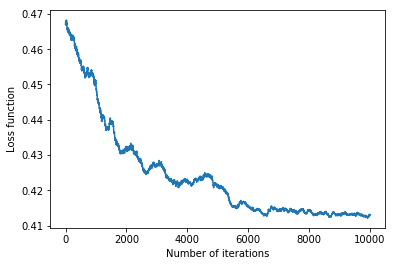

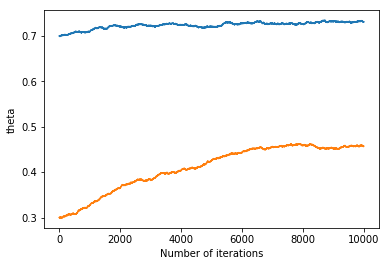

In [ ]:
print(averagef(next_theta[0,0], next_theta[0,1], 100000))
x = np.linspace(0,max_iters,max_iters+1)
loss=averagef(theta[:,0], theta[:,1], 100000)


#plt.plot(x,theta)
plt.plot(x, loss)
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')
plt.show()

plt.plot(x, theta)
plt.xlabel('Number of iterations')
plt.ylabel('theta')
plt.show()
